In [4]:
# So we can run from within the censusdis project and find the packages we need.
import os
import sys

sys.path.append(
    os.path.join(os.path.abspath(os.path.join(os.path.curdir, os.path.pardir)))
)
import os

import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from typing import Iterable, Optional

from censusdis.states import STATE_NJ, STATE_AK, STATE_HI, ALL_STATES_AND_DC
from censusdis.maps import ShapeReader, plot_us_boundary
import censusdis.maps as cem
import censusdis.data as ced
from censusdis.states import NY
import numpy as np

In [5]:
YEAR = 2020
DATASET = "acs/acs5"
VARIABLE = "B19013_001E"

The default census geopgraphies often contain areas of water. This can make maps look ugly:

/Users/canyonfoot/Documents/python_proj/censusdis/censusdis/data.py:492: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf_shapefile = gdf_shapefile.append(


<Axes: >

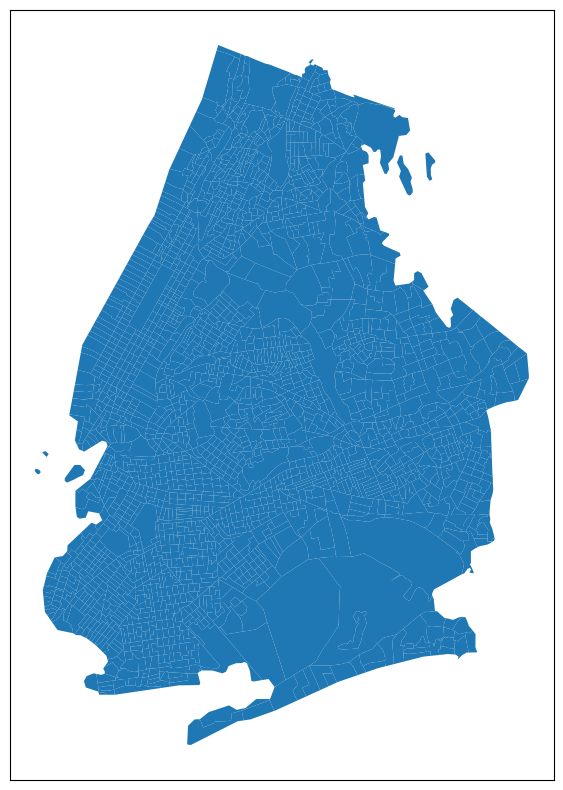

In [16]:
gdf_tract = ced.download(
    DATASET,
    YEAR,
    VARIABLE,
    state=NY,
    county=["061", "081", "005", "047"],
    tract="*",
    with_geometry=True,
)

cem.plot_map(gdf_tract, figsize=(10, 10))

The `remove_water` flag will query the TIGER API for the AREAWATER shapefiles and remove the water areas from the census geographies.

/Users/canyonfoot/Documents/python_proj/censusdis/censusdis/data.py:492: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf_shapefile = gdf_shapefile.append(


<Axes: >

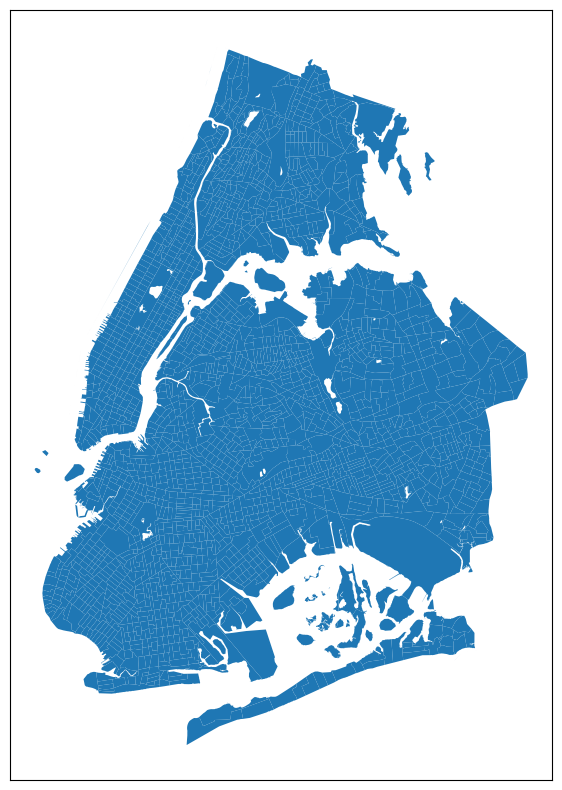

In [15]:
gdf_tract_no_water = ced.download(
    "acs/acs5",
    2021,
    "B19013_001E",
    with_geometry=True,
    remove_water=True,
    state=NY,
    county=["061", "081", "005", "047"],
    tract="*",
)

cem.plot_map(gdf_tract_no_water, figsize=(10, 10))

Sometimes, removing the water areas will leave small artifacts ('slivers') in areas where census boundaries and the county level water files are imperfectly aligned (look at the Hudson on the map). These can be removed using `remove_slivers`. 

In [18]:
gdf_tract_no_water_no_slivers = ced.remove_slivers(gdf_tract_no_water, 0.05)
cem.plot_map(gdf_tract_no_water, figsize=(10, 10))

AttributeError: module 'censusdis.data' has no attribute 'remove_slivers'

Removing water from larger areas with lots of water can be slow. Running the operation for NY state takes about five minutes on my machine.

In [9]:
gdf_state = ced.download(
    "acs/acs5", 2021, "B19013_001E", with_geometry=True, remove_water=True, state=NY
)

/Users/canyonfoot/Documents/python_proj/censusdis/censusdis/data.py:492: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf_shapefile = gdf_shapefile.append(


In [8]:
gdf_state.boundary.plot()

NameError: name 'gdf_state' is not defined

In [ ]:
gdf_all_counties.overlay(gdf_state)["FIPS"]

In [ ]:
year = 2021
counties = ced._identify_counties(gdf_state, year)
print("got counties")
water_gdf = ced._retrieve_water(counties, year)
print("got water")

In [3]:
cem.plot_map(gdf_tract.boundary, figsize=(10, 10))

NameError: name 'gdf_tract' is not defined

In [ ]:
cem.plot_map(NYC_without_water.boundary, figsize=(10, 10))